In [10]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [36]:
X = np.array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
              [1, 1, 2, 1, 3, 0, 5, 10, 1, 2],
              [500, 700, 750, 600, 1450, 800, 1500, 2000, 450, 1000],
              [1, 1, 2, 1, 2, 1, 3, 3, 1, 2]], dtype = np.float64)

y = np.array([0, 0, 1, 0, 1, 0, 1, 0, 1, 1], dtype = np.float64)

In [11]:
model = LinearRegression()
X = MinMaxScaler().fit_transform(X.T)
model.fit(X, y)


# MSE = mean((y_pred - y_true)**2) -> gradient = ..., w = ...

# 1. Вероятность обычно [0, 1], а при LinearRegression нет гарантий, что будет так
# 2. MSE = (1 - 0)**2 = 1

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [15]:
y_pred

array([0.2617132 , 0.17509907, 1.02794228, 0.21840613, 0.53795688,
       0.31862798, 1.20396413, 0.05324898, 0.28336673, 0.91967463])

In [6]:
model.coef_

array([ 0.00000000e+00, -1.86835968e-01, -4.33070617e-04,  1.06133271e+00])

In [9]:
y_pred = model.predict(X.T)
mean_squared_error(y, y_pred)

0.1027095355172261

In [13]:
y_pred = model.predict(X)
mean_squared_error(y, y_pred)

0.1027095355172261

In [ ]:
np.dot(X, w) -> [-np.inf, np.inf]
sigmoid(z) -> [0, 1]

P(X|y=1) = ... [0, 1]
P(X|y=0) = 1 - P(X|y=1)

P / (1 - P) = [0, np.inf]
np.log(P / (1 - P)) = [-np.inf, np.inf]

np.log(p / (1 - p)) = np.dot(X, w) -> p?
np.log(p / (1 - p)) = z
---
p / (1 - p) = np.exp(z)
p / (1 - p) = t

p = t * (1 - p) = t - tp
p + pt = t
p(1 + t) = t
p = t / (1 + t)

p = np.exp(z) / (1 + np.exp(z))
p = 1 / (1 + np.exp(-z))

p = 1 / (1 + np.exp(-np.dot(X, w)))
p = sigmoid(-np.dot(X, w))

/Users/a17582007/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  


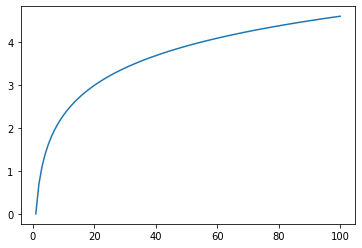

In [26]:
x = np.linspace(0, 100, 100)
plt.plot(x, np.log(x))
plt.xlim()

In [0]:
p = 1-1e-10
np.log(p / (1 - p))                       

23.025850847100088

In [0]:
p = 0.8
np.log(p / (1 - p))

1.3862943611198908

In [0]:
np.log(p / (1 - p)) # (-inf, +inf)

In [0]:
W*X = np.log(p / (1 - p))

In [0]:
z = W*X

In [0]:
z = np.log(p / (1 - p))

In [0]:
t = p / (1 - p) => t*(1-p) = p => t - t*p = p => t = p + t*p => t/p = 1 + t => p = t / (1 + t)

In [0]:
p = t / (1 + t)

In [0]:
z = np.log(t) => t = e**z => e**(W*X)

In [0]:
p = t / (1 + t) => p = e**z / (1 + e**z) => p = 1 / (1/e**z + 1) => p = 1 / (1 + e**(-z)) => p = 1/(1 + e**(-W*X))

In [0]:
p = 1/(1 + e**(-W*X))

In [0]:
p = 1 / (1 + np.exp(-z))
z = w*x

p = 1 / (1 + np.exp(-(w*x)))

p * (1 + np.exp(-(w*x))) = 1
     
(1 + np.exp(-(w*x))) = 1 / p

np.exp(-(w*x)) = 1 / p - 1
np.exp(-(w*x)) = (1 - p) / p
-(w*x) = log((1 - p) / p)


In [28]:
(1 - p) / p

array([[1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00,
        1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00],
       [1.00e+00, 1.00e+00, 2.00e+00, 1.00e+00, 3.00e+00, 0.00e+00,
        5.00e+00, 1.00e+01, 1.00e+00, 2.00e+00],
       [5.00e+02, 7.00e+02, 7.50e+02, 6.00e+02, 1.45e+03, 8.00e+02,
        1.50e+03, 2.00e+03, 4.50e+02, 1.00e+03],
       [1.00e+00, 1.00e+00, 2.00e+00, 1.00e+00, 2.00e+00, 1.00e+00,
        3.00e+00, 3.00e+00, 1.00e+00, 2.00e+00]])

In [29]:
y

array([0., 0., 1., 0., 1., 0., 1., 0., 1., 1.])

In [37]:
def calc_std_feat(x):
    res = (x - x.mean()) / x.std()
    return res

In [38]:
X_st = X.copy()
X_st[1, :] = calc_std_feat(X[1, :])
X_st[2, :] = calc_std_feat(X[2, :])
X_st[3, :] = calc_std_feat(X[3, :])

In [41]:
def calc_logloss(y, y_pred):
    err = - np.mean(y * np.log(y_pred) + (1.0 - y) * np.log(1.0 - y_pred))
    return err

In [52]:
# Пример применения
y1 = np.array([1, 0])
y_pred1 = np.array([0.002, 0.7])
calc_logloss(y1, y_pred1)

3.7092904513740637

In [ ]:
y_pred = 0.68

In [19]:
def sigmoid(z):
    res = 1 / (1 + np.exp(-z))
    return res

In [23]:
z = np.linspace(-10, 10, 101)
z

array([-10. ,  -9.8,  -9.6,  -9.4,  -9.2,  -9. ,  -8.8,  -8.6,  -8.4,
        -8.2,  -8. ,  -7.8,  -7.6,  -7.4,  -7.2,  -7. ,  -6.8,  -6.6,
        -6.4,  -6.2,  -6. ,  -5.8,  -5.6,  -5.4,  -5.2,  -5. ,  -4.8,
        -4.6,  -4.4,  -4.2,  -4. ,  -3.8,  -3.6,  -3.4,  -3.2,  -3. ,
        -2.8,  -2.6,  -2.4,  -2.2,  -2. ,  -1.8,  -1.6,  -1.4,  -1.2,
        -1. ,  -0.8,  -0.6,  -0.4,  -0.2,   0. ,   0.2,   0.4,   0.6,
         0.8,   1. ,   1.2,   1.4,   1.6,   1.8,   2. ,   2.2,   2.4,
         2.6,   2.8,   3. ,   3.2,   3.4,   3.6,   3.8,   4. ,   4.2,
         4.4,   4.6,   4.8,   5. ,   5.2,   5.4,   5.6,   5.8,   6. ,
         6.2,   6.4,   6.6,   6.8,   7. ,   7.2,   7.4,   7.6,   7.8,
         8. ,   8.2,   8.4,   8.6,   8.8,   9. ,   9.2,   9.4,   9.6,
         9.8,  10. ])

In [24]:
probabilities = sigmoid(z)

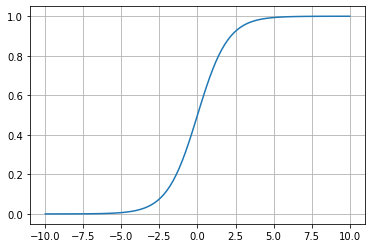

In [25]:
plt.plot(z, probabilities)
plt.grid()

In [ ]:
probability -> money
credit_amount * probability = expected_loss

np.where(probability >= threshold, 1, 0)
probability = 0.12

In [0]:
### Logistic Regression

In [62]:
def eval_model(X, y, iterations, alpha=1e-4):
    np.random.seed(42)
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    for i in range(1, iterations+1):
        z = np.dot(W, X)
        y_pred = sigmoid(z)
        err = calc_logloss(y, y_pred)
        W -= alpha * (1/n * np.dot((y_pred - y), X.T))
    if i % (iterations / 10) == 0:
        print(i, W, err)
    return W

In [63]:
W = eval_model(X_st, y, iterations=1000, alpha=1e-5)

[-1.42377462 -1.15662978  0.81081624 -1.2902022   1.6964431  -0.97367725
  3.614509    4.03547058 -1.49056084  1.1447473 ]
[0.19407052 0.23928021 0.69228341 0.21581859 0.84506961 0.27414816
 0.97377607 0.9826297  0.18383756 0.75855018]


In [58]:
from sklearn.linear_model import LogisticRegression as LR

LR?

In [ ]:
np.square(W) / C
lambda = 1 / C

In [ ]:
WOE-преобразование

In [68]:
# построение ROC-кривой

y_true = [0, 0, 0, 1, 1, 1, 0, 0, 0, 0]
y_pred = [0.1, 0.7, 0.85, 0, 0.9, 0.67, 0.15, 0.25, 0.6, 0.4]

In [72]:
import pandas as pd

df = pd.DataFrame({
    "y_true": y_true,
    "y_pred": y_pred
})

df = df.sort_values(by="y_pred", ascending=False)
df["y_pred"] = df["y_pred"]
df

,y_true,y_pred
4,1,0.90
2,0,0.85
1,0,0.70
5,1,0.67
8,0,0.60
9,0,0.40
7,0,0.25
6,0,0.15
0,0,0.10
3,1,0.00


In [70]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

(0, 1)

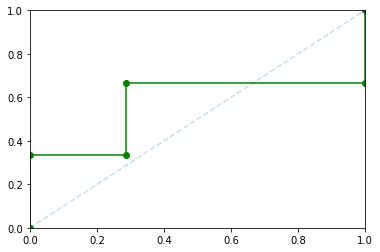

In [71]:
fpr, tpr, _ = roc_curve(y_true, y_pred)
plt.plot([0, 1], [0, 1], label="Random", linestyle="--", alpha=0.25)
plt.plot(fpr, tpr, color="green")
plt.scatter(fpr, tpr, color="green")
plt.xlim(0,1)
plt.ylim(0,1)

In [66]:
roc_auc_score(y_true, y_pred)

0.5714285714285714

In [ ]:
# WOE - преобразование